# LCF Analysis & Interpolation of Data

In [6]:
# File Handling
import os
import pickle

# Plot Handling
import matplotlib.pyplot as plt

# data handling
import numpy as np
import pandas as pd

# Make Plotting interactive
from ipywidgets import interact, fixed

# Wrapper for xraylarch (larch)
os.chdir('..')
pwd = os.getcwd()
os.chdir('./catxas')
import general as fcts
import xas as xfcts
import plot as pfcts
import process
import experiment as exp

%matplotlib inline

In [7]:
# Directory Containing Experiment:
pickle_dir = r'C:\Users\ashoff\Desktop\Python Test Bed'

# Name of Experiment (must include extension '.pickle')
pickle_name = 'ASH_NiOSiO2_TPR.pickle'

# Scan Naame for looking at parts of the Experiment Object
scan_name = '20240118_ASH_NiOSiO2_AP_Ni_K_EXAFS_92s.tra_0001'

In [8]:
pickle_path = os.path.join(pickle_dir,pickle_name)
pickle_in = open(pickle_path,"rb")
my_exp = pickle.load(pickle_in)
pickle_in.close()

In [4]:
# Mass Spec File (full path):
MS_filename = r'C:\Users\ashoff\Desktop\Python Test Bed\20240118_8014_Hoffman\BL9_3_20240118_ASH_NiOSiO2View2.csv' 

# AmP LabView File (full path):
LV_filename = r'C:\Users\ashoff\Desktop\Python Test Bed\20240118_8014_Hoffman\BL9_3_20240118_ASH_NiOSiO2.txt'

In [5]:
# Add Mass Spec Dataset
my_exp.import_massspec(MS_filename)

# Add LabView Dataset
my_exp.import_labview(LV_filename)

In [6]:
my_exp.correlate_process_params()

# Visualize Correlation Table

my_exp.summary['XAS Spectra Process Params']

Genearted Spectra Summary
Merged Index for Process: MS Data
Merged Index for Process: LV Data


,File Name,TOS [s],H2,He,H2O,28,O2,Vac,Temp,Stepnumber,...,Extra TC3 - Extra TC3 [°C],Extra TC4 - Extra TC4 [°C],Extra TC5 - Extra TC5 [°C],Extra TC6 - Extra TC6 [°C],Extra TC7 - Extra TC7 [°C],Extra TC8 - Extra TC8 [°C],Extra DO 1,Extra DO 2,Extra DO 3,Extra DO 4
Time,,,,,,,,,,,,,,,,,,,,,
2024-01-18 19:24:08,20240118_ASH_NiOSiO2_AP_Ni_K_EXAFS_92s.tra_0001,0.0,6.850243e-11,6.778213e-07,3.357567e-09,3.226511e-10,6.163557e-11,2.964600e-07,23.148589,0.0,...,2297.614717,2297.853595,2297.853595,2297.853595,2297.751370,2297.751370,0.0,0.0,0.0,0.0
2024-01-18 19:26:16,20240118_ASH_NiOSiO2_AP_Ni_K_EXAFS_92s.tra_0002,128.0,8.749410e-11,6.788967e-07,3.149313e-09,3.315540e-10,6.513050e-11,2.964600e-07,23.184433,0.0,...,2297.654815,2297.892205,2297.892205,2297.892205,2297.789437,2297.789437,0.0,0.0,0.0,0.0
2024-01-18 19:28:33,20240118_ASH_NiOSiO2_AP_Ni_K_EXAFS_92s.tra_0003,265.0,8.224476e-11,6.799945e-07,2.924043e-09,3.248257e-10,5.752827e-11,2.964600e-07,23.166500,0.0,...,2297.721510,2297.955991,2297.955991,2297.955991,2297.853658,2297.853658,0.0,0.0,0.0,0.0
2024-01-18 19:36:27,20240118_ASH_NiOSiO2_AP_V2_Ni_K_EXAFS_92s.tra_...,739.0,5.466787e-11,6.830684e-07,2.455747e-09,3.280859e-10,5.485211e-11,2.913080e-07,23.201104,0.0,...,2297.904263,2298.132653,2298.132653,2298.132653,2298.028437,2298.028437,0.0,0.0,0.0,0.0
2024-01-18 19:38:35,20240118_ASH_NiOSiO2_AP_V2_Ni_K_EXAFS_92s.tra_...,867.0,8.624874e-11,6.846082e-07,2.410978e-09,3.232815e-10,5.070980e-11,2.913080e-07,23.163940,0.0,...,2297.941484,2298.169952,2298.169952,2298.169952,2298.064755,2298.064755,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18 22:11:04,20240118_ASH_NiOSiO2_TPR_Ni_K_EXAFS_92s.tra_0069,10016.0,1.993310e-06,5.171598e-07,1.564054e-08,7.486866e-10,1.178190e-11,7.253710e-07,520.457500,0.0,...,2300.623592,2300.865387,2300.865387,2300.865387,2300.755266,2300.755266,0.0,0.0,0.0,0.0
2024-01-18 22:55:36,20240118_ASH_NiOSiO2_Red_Ni_K_EXAFS_92s.tra_0001,12688.0,2.118015e-06,5.134962e-07,1.443370e-08,7.720554e-10,3.618683e-11,7.253710e-07,25.787867,0.0,...,2300.383294,2300.648084,2300.648084,2300.648084,2300.526906,2300.526906,0.0,0.0,0.0,0.0
2024-01-18 22:57:43,20240118_ASH_NiOSiO2_Red_Ni_K_EXAFS_92s.tra_0002,12815.0,2.120011e-06,5.125184e-07,1.440101e-08,7.765196e-10,4.165884e-11,7.174866e-07,25.632313,0.0,...,2300.357610,2300.621320,2300.621320,2300.621320,2300.501437,2300.501437,0.0,0.0,0.0,0.0


## Perform LCF

    Notes:
        a. Basis sets must be larch groups that have been calibrated and normalized
        

### Major steps for performing LCF:
    
    a. Generate list of basis spectra groups
    b. Load basis set into a "Fit"
    c. Perform LCF
    d. Generate a Fit Report
    e. Visualize Fit and Errors with one Process Parameter
    f. Visulaize Single Fit
    
### 12a. Generate list of basis spectra groups

    In this section we ae using three basis spectra that are taken from the main data set, not standards.
        1. First Scan (*_0001)
        2. ~Middle Scan (*_0031)
        3. Last Scan (*_0050)
        
    Notes:
        1. Each basis gropu must have its own name.
        2. Basis are compiled into a list prior to uploading into the experiment

In [7]:
# LCF fit to be saved and file name for the LFC Fit Report
fit_name = 'Fit 1' 
fname_LCFReport_name = 'ASH_First_Last_LCFReport'

In [8]:
first = list(my_exp.spectra.keys())[0]

last = list(my_exp.spectra.keys())[-1]

print(f'First Scan Name: {first}\nLast Scan Name: {last}')

First Scan Name: 20240118_ASH_NiOSiO2_AP_Ni_K_EXAFS_92s.tra_0001
Last Scan Name: 20240118_ASH_NiOSiO2_Red_Ni_K_EXAFS_92s.tra_0004


In [9]:
# Basis set made from three spectra in the sample dataset
basis1 = my_exp.spectra[first]['Absorption Spectra']['mu Sample'] 
basis1.name = first

basis2 = my_exp.spectra[last]['Absorption Spectra']['mu Sample']
basis2.name = last



basis = [basis1, basis2]

In [10]:
# Load list of basis spectra into the experiment

my_exp.load_lcf_basis(basis, fit_name)

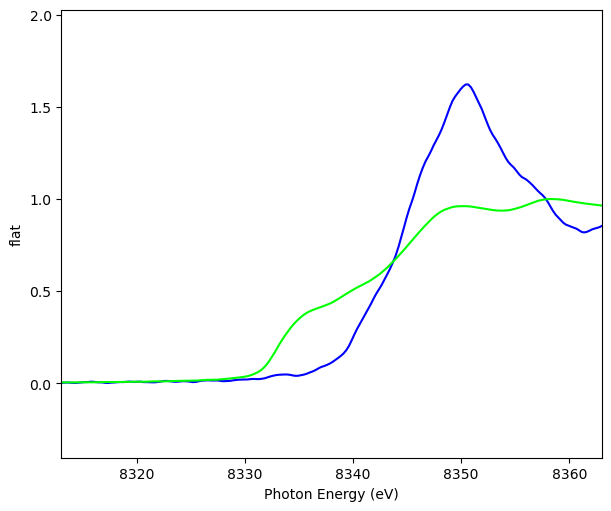

In [11]:
# Visualize basis sets for fitting

edge_energy = 8333

emin = edge_energy - 20
emax = edge_energy + 30

basis_groups = my_exp.analysis['LCF'][fit_name]['basis spectra']

pfcts.plot_XANES(basis_groups, emin, emax, spectra = 'flat', 
                 deriv = False, e0 = None, e0_line = False, 
                 overlay = True, use_legend = False)

In [12]:
# Fit the sample spectra
emin_fit = emin
emax_fit = emax
minvals = 0
maxvals = 1
array_name = 'flat'
sum_to_one = True

my_exp.fit_LCF(fit_name, emin_fit, emax_fit, 
               weights = None, minvals = minvals, maxvals = maxvals, 
               arrayname = array_name, sum_to_one = sum_to_one)

In [13]:
# Generate fit report for all spectra

my_exp.lcf_report(fit_name)

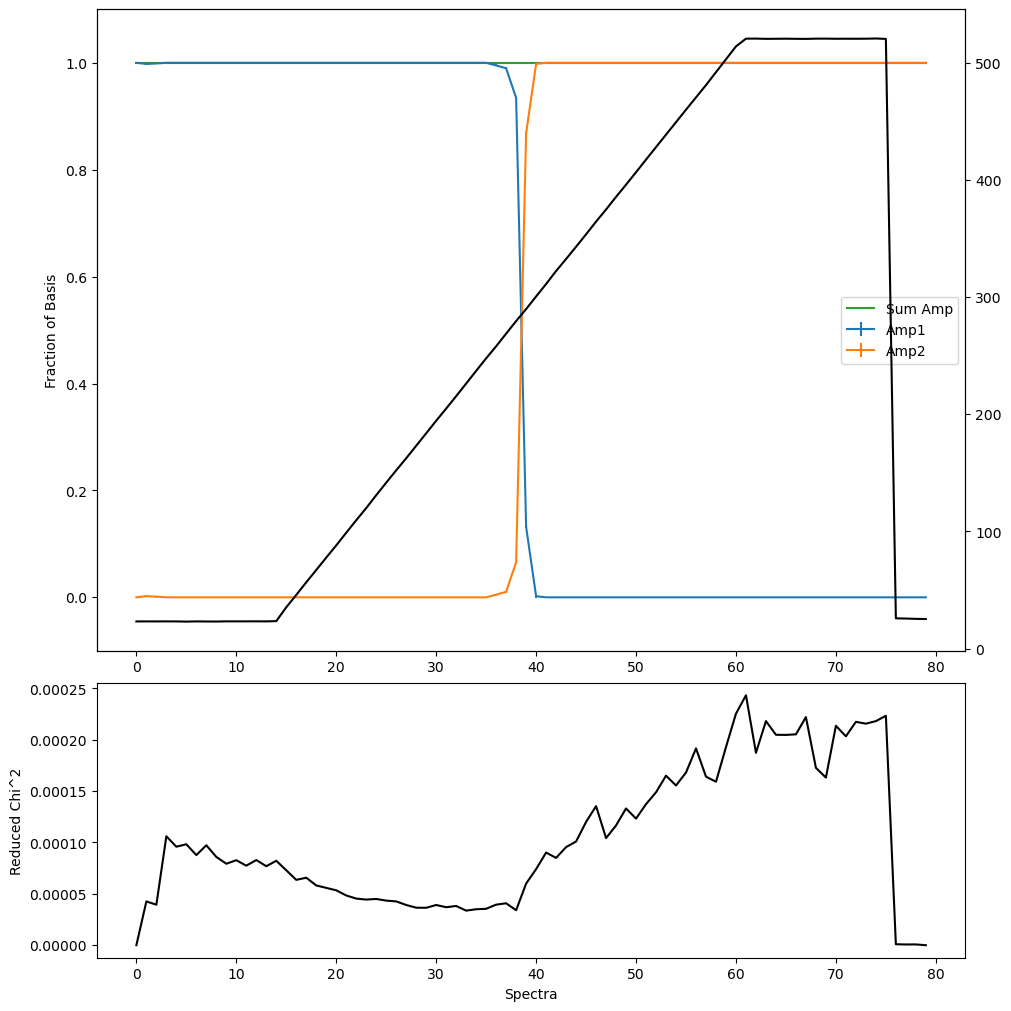

In [14]:
# Visualize Fit with process parameter

my_exp.plot_LCF_results(fit_name, process_parameter = 'Temp')

In [15]:
# Visualize individual fits

ymin = -0.05
ymax = 1.8

interact(my_exp.plot_LCF, spectra = my_exp.spectra.keys(),
        fit_name = fixed(fit_name),
        emin = fixed(emin), emax = fixed(emax), 
        ymin = fixed(ymin), ymax = fixed(ymax))

interactive(children=(Dropdown(description='spectra', options=('20240118_ASH_NiOSiO2_AP_Ni_K_EXAFS_92s.tra_000…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [16]:
# Folder where results will be saved
output_dir = pickle_dir

my_exp.save_lcf_results(os.path.join(output_dir,fname_LCFReport_name), 
                        fit_name, save_spectra = True)

Successfully created subdirectory
LCF Data Saved


### 13c. Interpolated XAS spectra (XANES)

    It may be useful to export the spectra on a uniform grid with a specific energy range.  Common uses are for:
        1. plotting in non-python siftware
        2. taking a subset of the data for use in alternative analysis packages (UU PCA/MCR-ALS)

#### Sub steps for saving interpolated spectra:
    1. Determine the largest possible energy range and step size - this looks for the largest startign erngy value, smallest ending energy, and average step size to to determine over/under sampling.
    2. Perform the interpolation based upon start/stop/step size.
    3. Save the data to a user specified .csv file and path
    
#### 13c-1. Determinin largest interpolation range given XAS structure

In [17]:
df = my_exp.check_Energy_Range(has_e0 = False, spectra_name = 'mu Sample', print_summary = True)

Energy Range and Energy-Step Summary for mu Sample
	Variation in starting energy points between spectra [eV]: 8133.62-8134.00
	Variation in ending energy points between spectra [eV]: 9307.91-9308.31
	Variation in step size of energy points between spectra [eV]: 0.24-0.24



#### 13c-2. Perform the interpolation based upon start/stop/step size

interpolation writes a dataframe to the exepriemnt.summary dictionary.

##### Modify:
    1. Start - energy to start the interpolation at
    2. Stop - energy to stop interpolation
    3. Step - energy step to interpolate on

In [18]:
# Set the energy range and step size to interpolate onto
start = 8135
stop = 9305
step = 0.25

In [19]:
# Interpolate Spectra
my_exp.interpolate_spectra(start, stop, step, x_axis = 'energy', sample = 'mu Sample')

<Axes: xlabel='energy'>

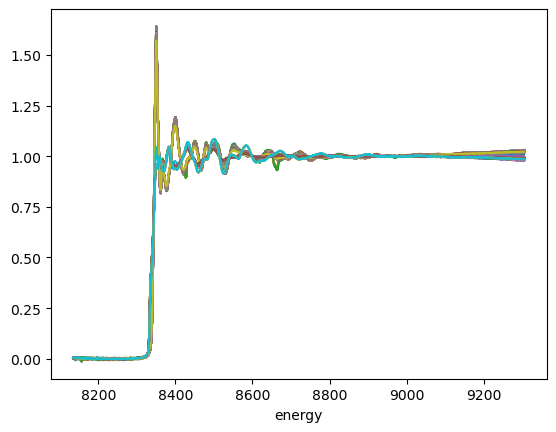

In [20]:
# Visualzie interpolated spectra with plot

my_exp.__dict__['summary']['Interpolated energy'].plot(legend=False)

In [5]:
# File name to save normalized and interpolated XAS spectra
output_dir = pickle_dir

fname_interpXAS = 'ASH_NiOSiO2_TPR_NormXANES'

# Save Normalized XANES:
my_exp.save_interpXAS(os.path.join(output_dir,fname_interpXAS),ext = '.txt', sep = '\t')

Process Parameter Data Saved


In [22]:
pickle_path = os.path.join(pickle_dir,pickle_name)

pickle_out = open(pickle_path,"wb")
pickle.dump(my_exp, pickle_out)
pickle_out.close()